<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/Cancer_data_call_back_batch_norm_kera_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using RandomSearchCV(model= KerasClassifier(builf_fn= model , param_distrubutions=dictionsry ,cv=KFold(3)**






In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print((cancer['data'].shape, cancer['target'].shape))
X=cancer['data']
y=cancer['target']

((569, 30), (569,))


Model function with Learning rate & activation paremeters. Using 1 input, 1 hidden & 1 output layer .Output has sigmoid activation as we are dealing with binary classification.We can only change the activation of the other layers

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense

In [0]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.30)

In [9]:
(X_train.shape,y_train.shape)

((398, 30), (398,))

In [0]:
print((cancer['data'].shape, cancer['target'].shape))

((569, 30), (569,))


In [10]:
(X_test.shape,y_test.shape)

((171, 30), (171,))

In [0]:
def my_model(learning_rate=0.01,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation=activation))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [0]:
model=KerasClassifier(build_fn=my_model)
params = {'activation': ['relu','tanh'], 'batch_size': [32,128,256], 
          'epochs': [50,100,200], 'learning_rate': [0.1,0.01,0.001]}

random_search=RandomizedSearchCV(model,param_distributions=params,cv=KFold(3))


In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
stop_early=EarlyStopping(monitor='val_acc',patience=3)

In [31]:
history=random_search.fit(X_train,y_train)

TypeError: ignored

In [32]:
history.best_score_

NameError: ignored

In [29]:
history.best_params_

{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}

# **With above best params we train our model.The 


my_model() function is redefined with these new params**


{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}



In [0]:
def my_model(learning_rate=0.001,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation='relu'))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
my_model=my_model(learning_rate=0.001,activation='relu')

In [36]:
historynew=my_model.fit(X_train,y_train,batch_size=128,epochs=200,validation_split=0.3,callbacks=[stop_early])

Epoch 1/200
3/3 [==============================] - 0s 37ms/step - loss: 20.3300 - accuracy: 0.4856 - val_loss: 21.3036 - val_accuracy: 0.3750
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 9.6430 - accuracy: 0.4281 - val_loss: 23.7022 - val_accuracy: 0.6250
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 18.0455 - accuracy: 0.6223 - val_loss: 0.8802 - val_accuracy: 0.7583
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 6.7107 - accuracy: 0.5719 - val_loss: 14.4111 - val_accuracy: 0.3750
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 8.0816 - accuracy: 0.3993 - val_loss: 1.4051 - val_accuracy: 0.8667
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 4.9863 - accuracy: 0.8058 - val_loss: 6.3978 - val_accuracy: 0.7333
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 2.5887 - accuracy: 0.7950 - val_loss: 1.7835 - val_accuracy: 0.7500
Epoch 8/200
3/3

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_loss(loss,val_loss):
  plt.figure(edgecolor='yellow')
  plt.plot(loss,color='red')
  plt.plot(val_loss,color='green')
  plt.xlabel('EPOCHS')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.title('Training vs Validation Loss')
  plt.show()

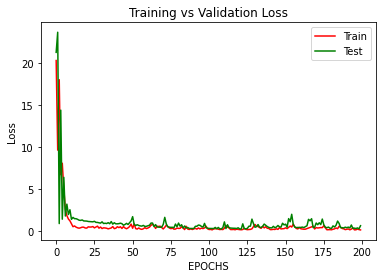

In [39]:
plot_loss(historynew.history['loss'],historynew.history['val_loss'])

In [0]:
def plot_accuracy(acc,val_acc):
  plt.figure(edgecolor='yellow')
  plt.plot(acc,color='red')
  plt.plot(val_acc,color='green')
  plt.xlabel('EPOCHS')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.title('Training vs Validation accuracy')
  plt.show()

In [21]:
for i in historynew.history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


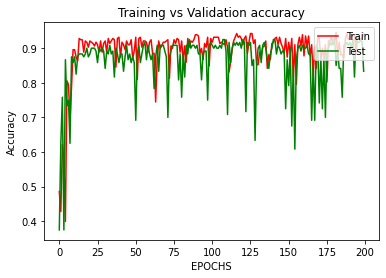

In [41]:
plot_accuracy(historynew.history['accuracy'],historynew.history['val_accuracy'])

# Fitting the model on the whole X and **y**

In [42]:
historynew=my_model.fit(X,y,batch_size=128,epochs=200,validation_split=0.2,callbacks=[stop_early])

Epoch 1/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3219 - accuracy: 0.9143 - val_loss: 0.3536 - val_accuracy: 0.8596
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1965 - accuracy: 0.9451 - val_loss: 0.2355 - val_accuracy: 0.9386
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2188 - accuracy: 0.9407 - val_loss: 0.3645 - val_accuracy: 0.8596
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2277 - accuracy: 0.9275 - val_loss: 0.3478 - val_accuracy: 0.8596
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3064 - accuracy: 0.9055 - val_loss: 0.3515 - val_accuracy: 0.9298
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3714 - accuracy: 0.9099 - val_loss: 0.2038 - val_accuracy: 0.9386
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3142 - accuracy: 0.9209 - val_loss: 1.0097 - val_accuracy: 0.6842
Epoch 8/200
4/4 [===

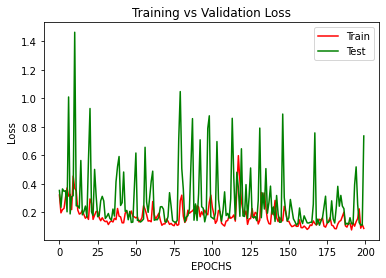

In [43]:
plot_loss(historynew.history['loss'],historynew.history['val_loss'])

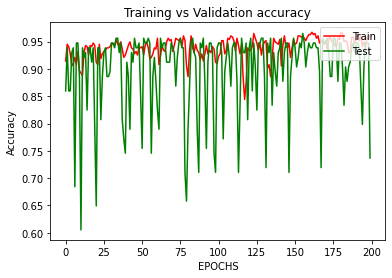

In [44]:
plot_accuracy(historynew.history['accuracy'],historynew.history['val_accuracy'])

### **Part -2**

Using the model with best params obtained from **RandomizedSearchCV.fit(X.y)**

{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}



In [0]:
def my_model(learning_rate=0.001,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation='relu'))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
my_tuned_model=my_model(learning_rate=0.001,activation='relu')

In [0]:
# Create a KerasClassifier...no need...no need here as it has no layers
model_kera_tuned = KerasClassifier(build_fn = my_tuned_model, epochs = 200,batch_size = 128, verbose = 0)

In [0]:
import keras.backend as K

In [0]:
# Input tensor from the 1st layer of the model
inp = my_tuned_model.layers[0].input

In [0]:
out=my_tuned_model.layers[0].output

In [0]:
inp_to_out=K.function(inp,out)

In [62]:
print(inp_to_out(X_test))

[[12.580634  10.500716   0.        ...  0.         0.         0.       ]
 [16.645084   0.         0.        ...  0.         0.         0.       ]
 [ 9.805404  11.763249   0.        ...  0.         0.         0.       ]
 ...
 [41.058636  21.925547   0.        ...  0.         0.         0.       ]
 [38.021706  29.361431   0.        ...  0.         0.         0.       ]
 [ 6.4508467 17.453012   0.        ...  0.         0.         0.       ]]
